In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [4]:
train_datagen =ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = \
train_datagen.flow_from_directory('/content/drive/MyDrive/skin cancer/Datasets',
 target_size=(IMG_SIZE, IMG_SIZE),
 batch_size=BATCH_SIZE,
 class_mode='categorical',
 subset='training')


Found 320 images belonging to 4 classes.


In [5]:
val_generator =train_datagen.flow_from_directory('/content/drive/MyDrive/skin cancer/Datasets',
 target_size=(IMG_SIZE, IMG_SIZE),
 batch_size=BATCH_SIZE,
 class_mode='categorical',
 subset='validation')

Found 80 images belonging to 4 classes.


In [6]:
class_indices = train_generator.class_indices
print(class_indices)
class_names = list(class_indices.keys())
print(class_names)

{'Acral': 0, 'Lentingo': 1, 'Nodular': 2, 'Superficial': 3}
['Acral', 'Lentingo', 'Nodular', 'Superficial']


In [7]:
model = keras.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(IMG_SIZE, IMG_SIZE, 3)),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_generator, epochs=2, validation_data=val_generator)

Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 92s 9s/step - accuracy: 0.2458 - loss: 1.9699 - val_accuracy: 0.5500 - val_loss: 0.9180
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.6473 - loss: 0.9106 - val_accuracy: 0.6500 - val_loss: 1.0699


In [12]:
model.save('/content/drive/MyDrive/skin cancer/Datasets/cancer.h5')

In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/drive/MyDrive/skin cancer/Datasets/cancer.h5')
print("Model Loaded")

Model Loaded


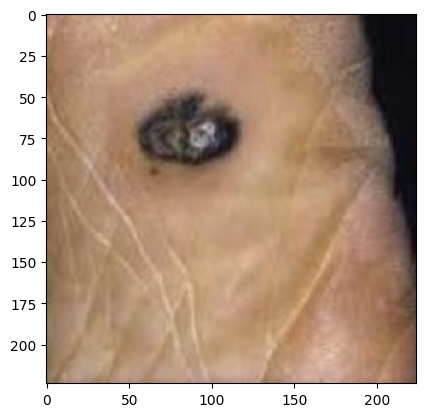

In [14]:
test_image_path="/content/drive/MyDrive/skin cancer/Datasets/Acral/10 - Copy.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()


In [15]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255
prediction =model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Acral
